In [1]:
import pandas as pd
import numpy as np
import pathlib
from scipy import constants
from pprint import pprint
import matplotlib.pyplot as plt
if True:
    import sys
    sys.path.append("/home/salmon/workspace/fytok/python")
    sys.path.append("/home/salmon/workspace/SpDB/python")
    sys.path.append("/home/salmon/workspace/SpView/python")

    from fytok.load_profiles import (load_core_profiles, load_core_source,
                                     load_core_transport, load_equilibrium)
    from fytok.modules.transport.Equilibrium import Equilibrium
    from fytok.numlib.smooth import rms_residual
    from spdm.data import File, Function, Query
    from spdm.logger import logger
    from spdm.view.plot_profiles import plot_profiles, sp_figure


###########################


In [2]:
#eqdsk_file = File("/home/salmon/workspace/data/15MA inductive - burn/Standard domain R-Z/High resolution - 257x513/g900003.00230_ITER_15MA_eqdsk16HR.txt", format="geqdsk").read()

eqdsk_file = File("/home/salmon/workspace/fytok/test.geqdsk", format="geqdsk").read()

desc = load_equilibrium(eqdsk_file,
                        coordinate_system={
                            "psi_norm": np.linspace(0.0,  0.995, 128),
                            "theta": 64},
                        code={"name": "dummy"},
                        boundary={"psi_norm": 0.995}
                        )
eq = Equilibrium(desc)
psi_norm = np.linspace(0.0, 0.995, 32)


2022-11-22 09:44:36,281 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/sp_export.py:101:sp_find_module_by_name: Load module spdm.plugins.data.file.PluginGEQdsk
2022-11-22 09:44:36,282 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open GEQdskFile: /home/salmon/workspace/fytok/test.geqdsk mode='r'
2022-11-22 09:44:36,283 DEBUG [spd] /home/salmon/workspace/fytok/python/spdm/plugins/data/file/PluginGEQdsk.py:294:__init__: Open File /home/salmon/workspace/fytok/test.geqdsk mode=r
2022-11-22 09:44:36,306 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/sp_export.py:101:sp_find_module_by_name: Load module fymodules.transport.equilibrium.dummy


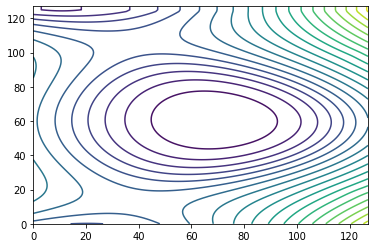

In [3]:
plt.contour(eq.profiles_2d._coord._psirz._array.transpose(),levels=20)
plt.countour(eq._cache["profiles_2d","psi"])

/fuyun/software/SciPy-bundle/2020.11-foss-2020b/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


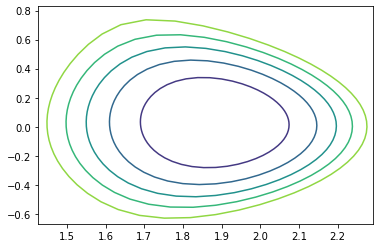

In [4]:
plt.contour(eq.profiles_2d.r,eq.profiles_2d.z,eq.profiles_2d.psi(eq.profiles_2d.r,eq.profiles_2d.z))

<AxesSubplot:>

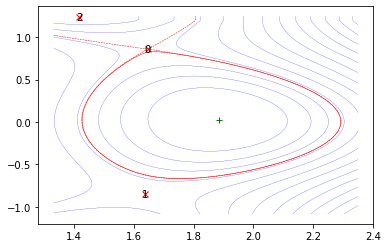

In [7]:
eq.plot(
    boundary=True,
    separatrix=True,
    contour=np.linspace(0,5,20),)



NameError: name 'eq' is not defined

In [25]:
def sp_ATEC_to_equilibrium_profiles_2d(fpath):
    def _read_data(fid, count, width=16):
        data = []
        for n in range(count):
            data.append(float(fid.read(width)))
            if n >= count - 1 or ((n + 1) % 5 == 0):
                fid.readline()
            else:
                fid.read(1)
        data = np.asarray(data)
        return data

    profiles_2d = {"grid_type": {"name": "rectangular", "index": 1}}

    with open(fpath,  mode="r") as fid:

        nw = int(fid.read(5))
        fid.read(1)
        nh = int(fid.read(5))
        fid.readline()

        data = _read_data(fid, nw*nh+nw+nh, width=20)

        psirz = data[:nw*nh].reshape([nh, nw])
        dim1 = data[nw*nh::2]
        dim2 = data[nw*nh+1::2]

        profiles_2d["grid"] = {"dim1": dim1, "dim2": dim2, }

        profiles_2d["psi"] = psirz

    return profiles_2d


In [39]:

# dd["equilibrium"]["vacuum_toroidal_field"] = {"b0": 5, "r0": 4.0, }
# dd["equilibrium"]["global_quantities"] = {"ip": 1e6}

dd=eq.dump()

dd = {"equilibrium": {
    "vacuum_toroidal_field": {"b0": 5, "r0": 4.0, },
    "global_quantities": {"ip": 1e6},
    "profiles_1d": {
        "fpol",
        None
    }

}}


dd["equilibrium"]["profiles_2d"] = sp_ATEC_to_equilibrium_profiles_2d("/home/salmon/workspace/atec/ATEC_craft/eqoutput")

eq_new = Equilibrium(dd["equilibrium"])


SyntaxError: invalid syntax (375023482.py, line 7)

<AxesSubplot:>

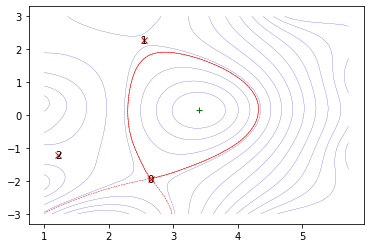

In [27]:
eq_new.plot(
    boundary=True,
    separatrix=True,
    contour=np.linspace(0,5,20),)

In [19]:
def sp_xt_to_equilibrium_profiles_1d(fpath, names=["pressure", "pprime", "ffprime"], **kwargs):
    d = np.genfromtxt(fpath, skip_header=1, names=names, delimiter=16, **kwargs)
    return {
        "profiles_1d": {
            "pressure": d["pressure"],
            "pprime": d["pprime"],
            "ffprime": d["ffprime"],
        }
    }


dd = sp_xt_to_equilibrium_profiles_1d("/home/salmon/workspace/atec/ATEC_craft/ppffp.dat")


In [20]:
dd

{'profiles_1d': {'pressure': array([46359.9375 , 45136.8047 , 44018.8438 , 42993.5898 , 42048.5742 ,
         41171.332  , 40348.7812 , 39564.3828 , 38800.457  , 38046.9531 ,
         37306.0586 , 36580.7695 , 35871.625  , 35177.9062 , 34498.6172 ,
         33832.0742 , 33176.6055 , 32531.709  , 31897.6914 , 31274.7773 ,
         30662.6973 , 30061.1113 , 29469.5703 , 28887.5547 , 28314.6367 ,
         27750.7969 , 27196.166  , 26650.7383 , 26114.3574 , 25586.8633 ,
         25068.0586 , 24557.7188 , 24055.7188 , 23562.0625 , 23076.7598 ,
         22599.7734 , 22131.0312 , 21670.4922 , 21218.1855 , 20774.1348 ,
         20338.1992 , 19910.1016 , 19489.6836 , 19076.9043 , 18671.8066 ,
         18274.3027 , 17884.2832 , 17501.6387 , 17126.3789 , 16758.5547 ,
         16398.1758 , 16045.123  , 15699.3223 , 15360.6973 , 15029.2773 ,
         14705.1016 , 14387.9844 , 14077.8242 , 13774.375  , 13477.4609 ,
         13187.0938 , 12903.082  , 12625.3613 , 12353.8184 , 12088.5    ,
         11

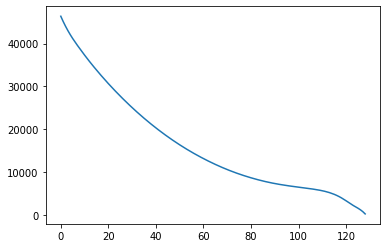

In [22]:
plt.plot(dd["profiles_1d"]["pressure"])

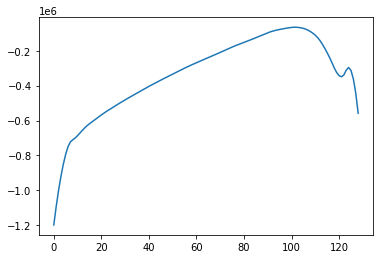

In [17]:
plt.plot(dd["pprime"])

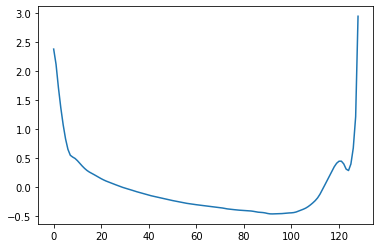

In [18]:
plt.plot(dd["ffprime"])